analyze the data to show how four treat
ments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
* TUMORVOL Scatter plot: tumor volume changes over time for each treatment
(MAYBE SOME RECODING, BINNING?
* METS Scatter plot:  number of metastatic sites - changes over time for each treatment
* SURVIVALRATE Scatter plot:  number of mice still alive through the course of treatment (Survival Rate)
*...(operationalize as mouseid that contains all the timepoints)*
* TUMOR VOL BAR GRAPH: compares the total % tumor volume change for each drug across the full 45 days.
*...stacked bar- time on x, stacks are drugs, Y is % change

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
%ls

Instructions/        pydrug_sketch.ipynb
README.md            raw_data/


In [3]:
drugs = pd.read_csv('raw_data/mouse_drug_data.csv')
tumors = pd.read_csv('raw_data/clinicaltrial_data.csv')

In [4]:
tumors.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
drugs.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
tumors.shape

(1893, 4)

In [7]:
drugs.shape

(250, 2)

In [8]:
pd.merge?

In [9]:
data = pd.merge(drugs, tumors, how='outer')

In [70]:
data.head(35)

,mouse_id,Drug,Timepoint,tumor_vol,mets
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


**is it NEW metastatic sites, or a running total?**

** Variable and Data Types** 
- Mouse ID               object - categorical/nominal
- Drug                   object - categorical/nominal
- Timepoint               int64 - ordinal
- Tumor Volume (mm3)    float64 - interval/ratio
- Metastatic Sites        int64 - interval
- dtype: object

In [11]:
data.dtypes

Mouse ID               object
Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [12]:
data = data.rename(columns={'Mouse ID': 'mouse_id', 'Tumor Volume (mm3)': 'tumor_vol','Metastatic Sites': 'mets'})

In [13]:
data.head()

,mouse_id,Drug,Timepoint,tumor_vol,mets
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


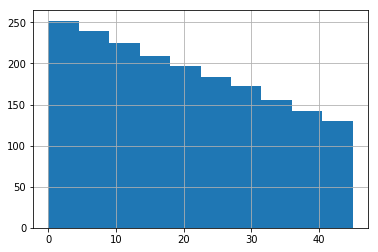

In [14]:
data.Timepoint.hist()

**there are TEN timepoints**

In [15]:
data.Timepoint.value_counts()
#ten time points

0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Timepoint, dtype: int64

**??The problem says there are 250 mice.**

In [16]:
data['mouse_id'].nunique()

249

In [17]:
data['mouse_id'].count()

1906

In [18]:
mets_per_mouse = data.groupby('mouse_id')['mets'].mean()

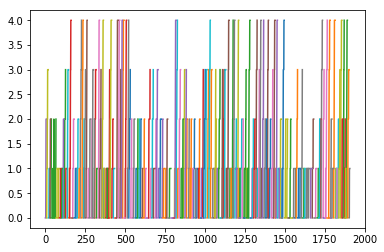

In [19]:
data.groupby('mouse_id')['mets'].plot();
#why aren't there 250 bars? 

In [20]:
data.mets.nlargest()

159    4
160    4
226    4
235    4
236    4
Name: mets, dtype: int64

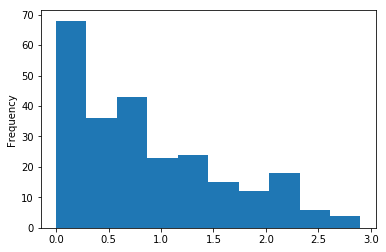

In [21]:
mets_per_mouse.plot.hist()

### METS

In [23]:
# sns.lmplot(x='data.Timepoint', y='mets_per_mouse', hue='data.Drug', data='data')
#            #fit_reg=False)
# # data=data.loc['data.Timepoint' =='40'], 

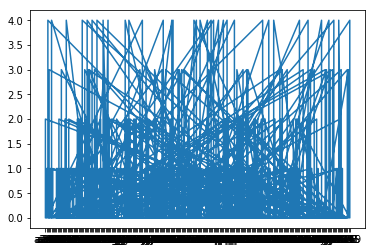

In [24]:
plt.plot(data.mouse_id, data.mets, label='mets');

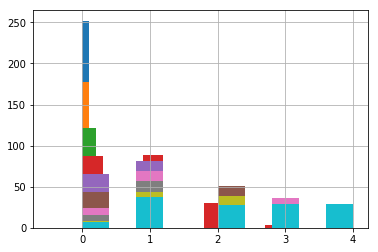

In [25]:
data.groupby('Timepoint')['mets'].hist(bins=10);

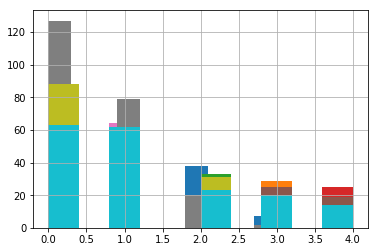

In [26]:
data.groupby('Drug')['mets'].hist(bins=10);

### TUMORVOLUME

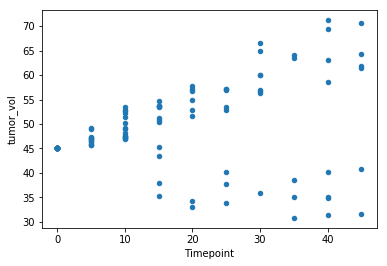

In [27]:
sample = data.sample(100)
sample.plot.scatter(x = 'Timepoint', y = 'tumor_vol')
#for each treatment
#reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

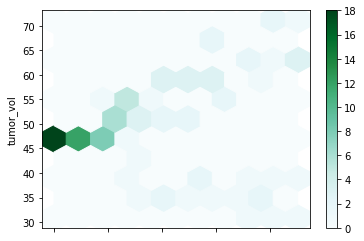

In [28]:
sample.plot.hexbin(x = "Timepoint", y = 'tumor_vol', gridsize=10)

In [29]:
data.Drug.value_counts()
#Capomulin, Infubinol, Ketapril, and Placebo

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [30]:
capomulin = data[data.Drug == "Capomulin"]
infubinol = data[data.Drug == "Infubinol"]
ketapril = data[data.Drug == "Ketapril"]
placebo = data[data.Drug == "Placebo"]

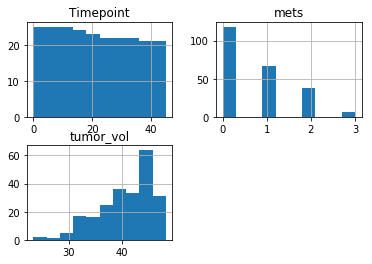

In [31]:
capomulin.hist();
#could do some sns.FacetGrid stuff

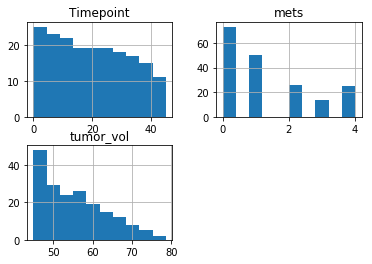

In [32]:
ketapril.hist();

In [ ]:
infubinol.hist();

In [ ]:
placebo.hist();

In [ ]:
# Create a scatter plot which compares MPG to horsepower
# car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(20,10),
#               title="Horsepower Vs. MPG", s=car_data.cylinders * 10)
# plt.show()

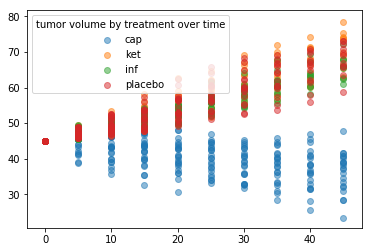

In [45]:
plt.scatter(capomulin.Timepoint, capomulin.tumor_vol, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.tumor_vol, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.tumor_vol, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, placebo.tumor_vol, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

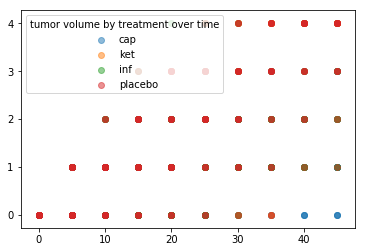

In [46]:
plt.scatter(capomulin.Timepoint, capomulin.mets, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.mets, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.mets, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, placebo.mets, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

In [35]:
data.groupby('mouse_id')['mets'].count()
#so the ones where count == 10 survived? 
#make this a mask

mouse_id
a203    10
a251    10
a262    10
a275    10
a366     7
a401    10
a411    10
a444    10
a457     3
a492    10
a520    10
a577     7
a644    10
a685    10
a699    10
a788     7
a818    10
a897    10
a963    10
b128    10
b313     6
b447     1
b487     6
b559    10
b742    10
b759     7
b879    10
c139    10
c264    10
c282    10
        ..
w697     8
w746     2
w914    10
x111     3
x209     3
x226     1
x264     9
x336     1
x401    10
x402    10
x581    10
x613     4
x773    10
x822    10
x930     6
y163    10
y260    10
y449     4
y478    10
y601     2
y769    10
y793    10
y865    10
z234     2
z314     2
z435     3
z578    10
z581    10
z795    10
z969    10
Name: mets, Length: 249, dtype: int64

## Survival Rate

* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* plot what???? -- how many mice are still alive at T0, T5, etc? up to T45? 
* why would this be a scatterplot? 

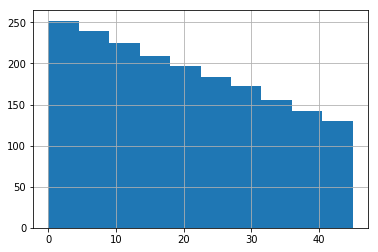

In [101]:
data.Timepoint.hist();
#but this still contains drugs we aren't looking at. 

In [38]:
survivors = data.query('Timepoint == 45')

In [41]:
survivors.size
#down from 1906

650

In [43]:
survivors.nunique()
#uh oh need to just get drugs of interest

mouse_id     130
Drug          10
Timepoint      1
tumor_vol    130
mets           5
dtype: int64

In [44]:
survivors.head()

,mouse_id,Drug,Timepoint,tumor_vol,mets
17,x402,Stelasyn,45,61.619606,3
27,a492,Stelasyn,45,60.122011,1
76,m269,Stelasyn,45,75.123690,1
86,a963,Stelasyn,45,62.765093,1
96,t451,Stelasyn,45,68.711630,1


In [47]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [88]:
mask_drugs = survivors['Drug'].isin(drugs)

In [89]:
survivors = survivors[mask_drugs]

In [97]:
survivors.size
#for each mouse there should be only one record where Timepoint == 45. 
#size is number of elements in df. 52*5=260 

260

In [96]:
survivors.shape

(52, 5)

In [94]:
survivors.nunique()
#so why are there 52 unique mice? 

mouse_id     52
Drug          4
Timepoint     1
tumor_vol    52
mets          5
dtype: int64

In [76]:
survivors['tumor_vol'].groupby(survivors['Drug']).describe()

,count,mean,std,min,25%,50%,75%,max
Drug,,,,,,,,
Capomulin,21.0,36.236114,5.608969,23.343598,32.377357,37.311846,40.159220,47.685963
Infubinol,9.0,65.755562,3.433282,60.918767,62.754451,66.083066,67.685569,72.226731
Ketapril,11.0,70.662958,4.819674,62.909441,67.129166,69.872251,74.002742,78.567014
Placebo,11.0,68.084082,4.483167,58.634971,65.955820,69.042841,71.486792,73.212939


In [99]:
s = survivors.groupby(['mouse_id', 'Drug']).size()
#this is unnecessary but perhaps a simpler way to do this. 

In [83]:
len(s)

52

In [102]:
mask_drugs_for_all = data['Drug'].isin(drugs)

In [103]:
data_filtered_for_drugs = data[mask_drugs_for_all]

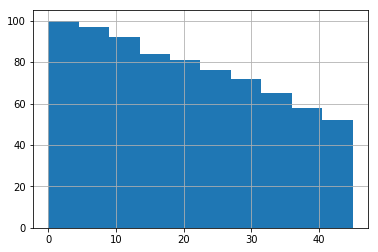

In [106]:
data_filtered_for_drugs.Timepoint.hist();
#but this isn't grouped by mouseid. 

### bar graph - total % tumor volume change for each drug across the full 45 days.
x = time 
color = drug
y = tumor volume change (so there is a calculation to be done on df before plotting)

In [ ]:
tumor_vol_change = data.groupby['Drug']('tumor_vol').count()
# gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
# gender_chart.set_xlabel("Time")
# gender_chart.set_ylabel("Tumor Volume")

In [ ]:
df.plot.bar(stacked=True)